## Hoverboard Controller

The hoverboard firmware expects a value between -1000 to 1000 to set the speed of a wheel. Values between -49 and 49 are set to 0 in the code.

To test the firmware we run the code in test-firmware.py on the robot and pipe the output to the a file. A sample file is provided in test-firmware.log. No ground forces were applied when runnung the test.

We analyze the log file

In [1]:
import numpy as np
data = np.loadtxt("test-firmware.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [2]:
def get_stats(data, feedback):
    side = 'r'
    set_speeds = np.unique(data[:, colmap["set_speed_%s" % side]])
    for set_speed in set_speeds:
        s_max = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].max()
        s_min = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].min()
        s_av = np.average(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_med = np.median(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_std = np.std(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_values = np.unique(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_spread = len(s_values)
        print("set_speed_%s:%s min:%.2f max:%.2f average:%.2f median:%.2f deviation:%.2f spread:%s (%s)" % (side, int(set_speed), s_min, s_max, s_av, s_med, s_std, s_spread, s_values))

In [3]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:0 min:0.00 max:0.00 average:0.00 median:0.00 deviation:0.00 spread:1 ([0.])
set_speed_r:100 min:0.00 max:0.50 average:0.32 median:0.50 deviation:0.24 spread:2 ([0.  0.5])
set_speed_r:200 min:0.77 max:0.80 average:0.79 median:0.79 deviation:0.01 spread:4 ([0.77 0.78 0.79 0.8 ])
set_speed_r:300 min:1.22 max:1.28 average:1.26 median:1.26 deviation:0.01 spread:7 ([1.22 1.23 1.24 1.25 1.26 1.27 1.28])
set_speed_r:400 min:1.68 max:1.75 average:1.72 median:1.72 deviation:0.02 spread:8 ([1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75])
set_speed_r:500 min:2.12 max:2.21 average:2.17 median:2.17 deviation:0.02 spread:10 ([2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21])
set_speed_r:600 min:2.56 max:2.66 average:2.61 median:2.61 deviation:0.02 spread:11 ([2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66])
set_speed_r:700 min:2.99 max:3.10 average:3.05 median:3.05 deviation:0.02 spread:12 ([2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1 ])
set_speed_r:800 min:3.40 max:3.5

In [4]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:0 min:0.00 max:0.00 average:0.00 median:0.00 deviation:0.00 spread:1 ([-0.])
set_speed_r:100 min:0.00 max:0.50 average:0.44 median:0.50 deviation:0.17 spread:2 ([0.  0.5])
set_speed_r:200 min:1.02 max:1.08 average:1.06 median:1.06 deviation:0.01 spread:7 ([1.02 1.03 1.04 1.05 1.06 1.07 1.08])
set_speed_r:300 min:1.60 max:1.72 average:1.68 median:1.68 deviation:0.03 spread:13 ([1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72])
set_speed_r:400 min:2.18 max:2.35 average:2.28 median:2.29 deviation:0.04 spread:17 ([2.18 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32
 2.33 2.34 2.35])
set_speed_r:500 min:2.75 max:2.96 average:2.87 median:2.88 deviation:0.05 spread:21 ([2.75 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89
 2.9  2.91 2.92 2.93 2.94 2.95 2.96])
set_speed_r:600 min:3.31 max:3.54 average:3.45 median:3.46 deviation:0.06 spread:24 ([3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44
 3.45 3.46 3.47 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [6]:
def draw_feedback(data, feedback1, feedback2):
    i = 0
    set_speeds = np.unique(data[:, colmap["set_speed_r"]])
    fig, axs = plt.subplots(len(set_speeds), 2,figsize=(15,10))
    for set_speed in set_speeds:
        for k in range(2):
            if k:
                feedback = feedback2
            else:
                feedback = feedback1
            y = data[data[:, colmap["set_speed_r"]] == set_speed][:, colmap[feedback]]
            x = range(len(y))
            axs[i, k].set_ylim([0, 6])
            axs[i, k].plot(x,y)
        i += 1

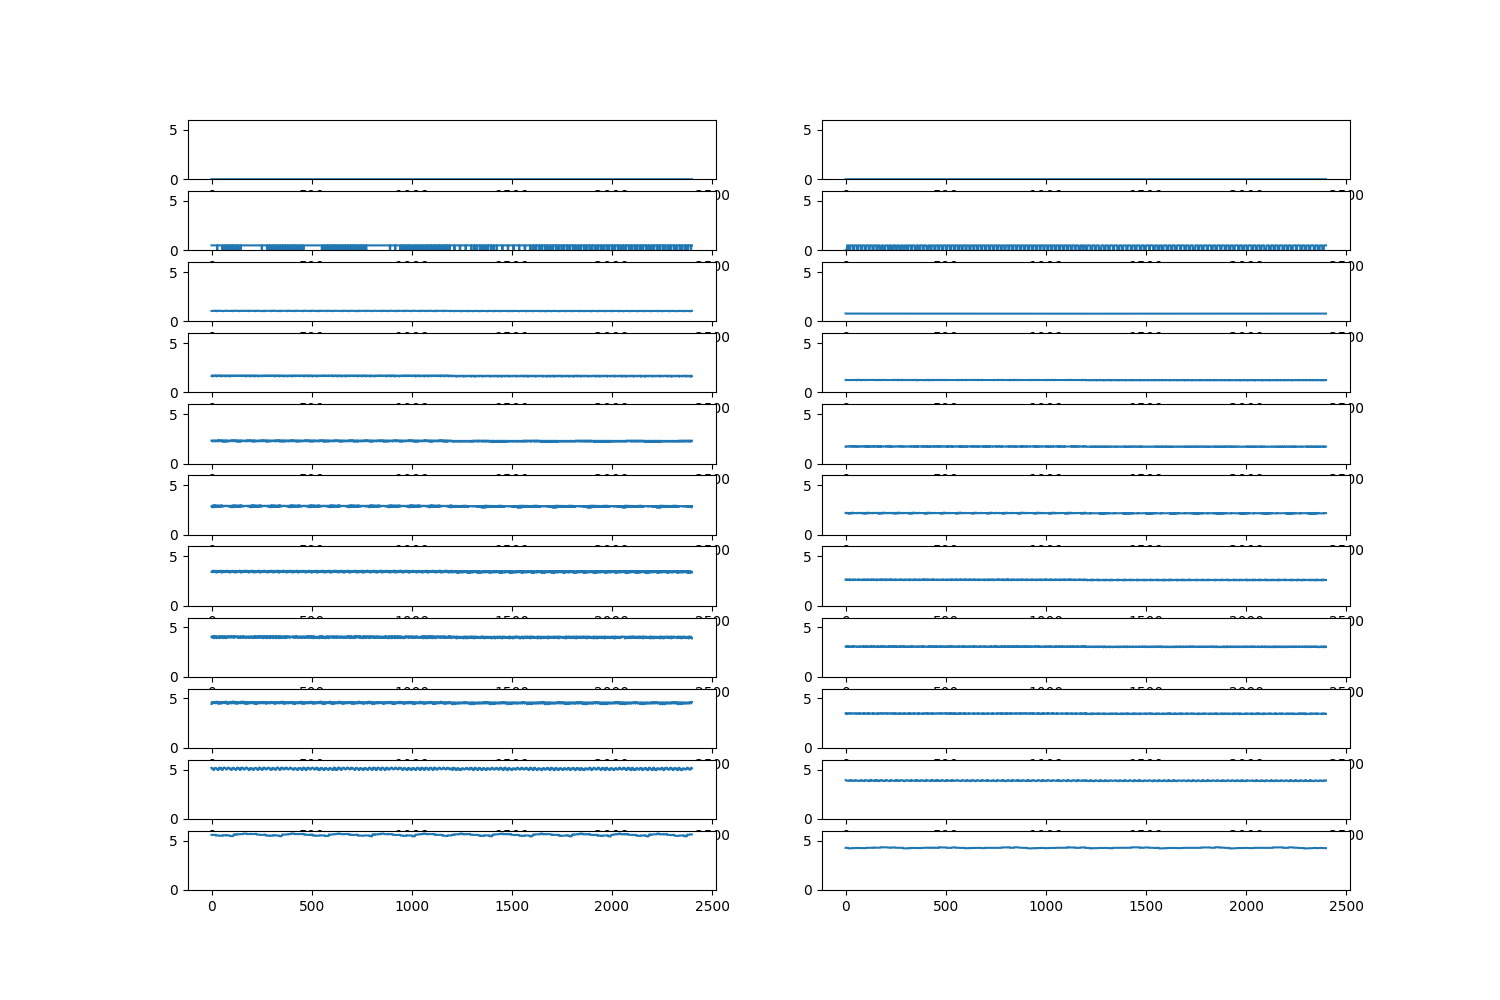

In [7]:
draw_feedback(data, "speed_l", "speed_r")

### Observations
There are differences between the wheel. The speed set differs from the speed measured

The variation of feedback is also quite signigicant, in particular at a speed setting of 100. Since we want to move the robot at low speed we need to have a closer look.
For that we run test-firmware.py again but we modify the code to cover a range from 50 to 160 with a step size of 10

A sample log is in test-firmware-slow.log. No ground forces were applied when runnung the test.

In [8]:
data = np.loadtxt("test-firmware-slow.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [9]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:50 min:0.00 max:0.50 average:0.06 median:0.00 deviation:0.16 spread:2 ([0.  0.5])
set_speed_r:60 min:0.00 max:0.50 average:0.12 median:0.00 deviation:0.21 spread:2 ([0.  0.5])
set_speed_r:70 min:0.00 max:0.50 average:0.16 median:0.00 deviation:0.23 spread:2 ([0.  0.5])
set_speed_r:80 min:0.00 max:0.50 average:0.21 median:0.00 deviation:0.25 spread:2 ([0.  0.5])
set_speed_r:90 min:0.00 max:0.50 average:0.26 median:0.50 deviation:0.25 spread:2 ([0.  0.5])
set_speed_r:100 min:0.00 max:0.50 average:0.31 median:0.50 deviation:0.24 spread:2 ([0.  0.5])
set_speed_r:110 min:0.00 max:0.50 average:0.35 median:0.50 deviation:0.23 spread:2 ([0.  0.5])
set_speed_r:120 min:0.00 max:0.50 average:0.40 median:0.50 deviation:0.20 spread:2 ([0.  0.5])
set_speed_r:130 min:0.00 max:0.50 average:0.44 median:0.50 deviation:0.16 spread:2 ([0.  0.5])
set_speed_r:140 min:0.00 max:0.50 average:0.49 median:0.50 deviation:0.07 spread:2 ([0.  0.5])
set_speed_r:150 min:0.53 max:0.54 average:0.53 median:0

In [10]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:50 min:0.00 max:0.50 average:0.11 median:0.00 deviation:0.21 spread:2 ([0.  0.5])
set_speed_r:60 min:0.00 max:0.50 average:0.18 median:0.00 deviation:0.24 spread:2 ([0.  0.5])
set_speed_r:70 min:0.00 max:0.50 average:0.24 median:0.00 deviation:0.25 spread:2 ([0.  0.5])
set_speed_r:80 min:0.00 max:0.50 average:0.30 median:0.50 deviation:0.24 spread:2 ([0.  0.5])
set_speed_r:90 min:0.00 max:0.50 average:0.36 median:0.50 deviation:0.22 spread:2 ([0.  0.5])
set_speed_r:100 min:0.00 max:0.50 average:0.43 median:0.50 deviation:0.18 spread:2 ([0.  0.5])
set_speed_r:110 min:0.00 max:0.50 average:0.49 median:0.50 deviation:0.08 spread:2 ([0.  0.5])
set_speed_r:120 min:0.53 max:0.55 average:0.55 median:0.55 deviation:0.01 spread:3 ([0.53 0.54 0.55])
set_speed_r:130 min:0.59 max:0.62 average:0.61 median:0.61 deviation:0.01 spread:4 ([0.59 0.6  0.61 0.62])
set_speed_r:140 min:0.65 max:0.68 average:0.67 median:0.67 deviation:0.01 spread:4 ([0.65 0.66 0.67 0.68])
set_speed_r:150 min:0.71

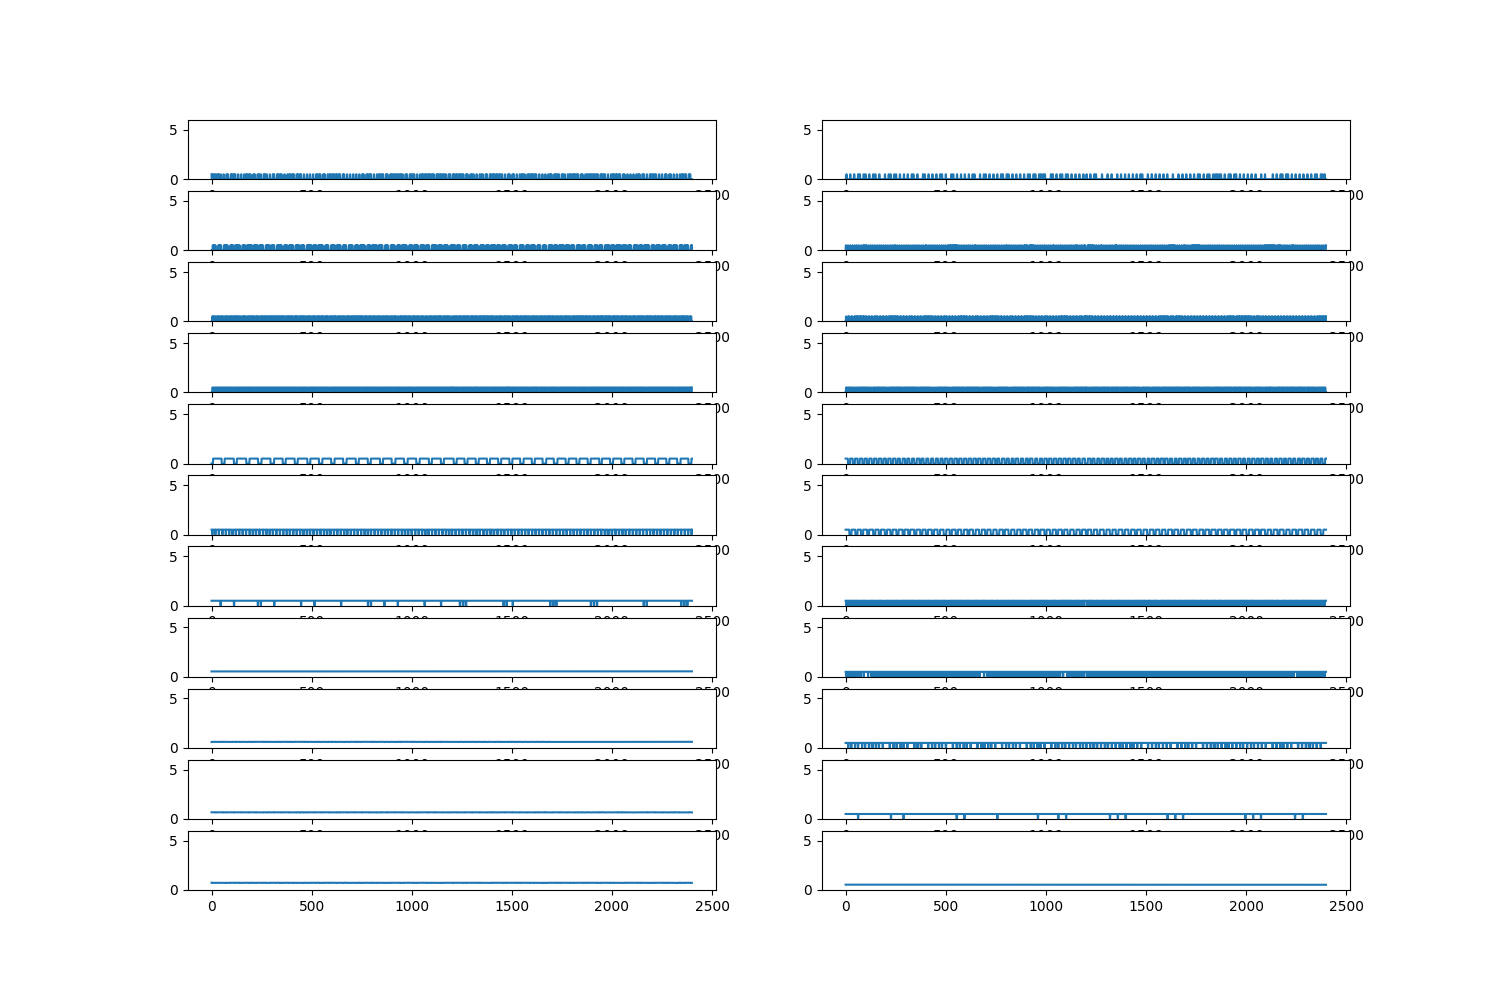

In [11]:
draw_feedback(data, "speed_l", "speed_r")

### Firmware code

UART communication with the proxy is handled in commsSteering.c The speed for each wheel is stored in the global variables defied in main.c

    int32_t leftSpeed = 0;                                                                          // left speed setpoint (-1000,+1000)
    int32_t rightSpeed = 0;                                                                         // right speed setpoint (-1000,+1000)

These values are clamped as follows

    pwmSlave  =  leftSpeed < 50 &&  leftSpeed > -50 ? 0 : CLAMP( leftSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    pwmMaster = rightSpeed < 50 && rightSpeed > -50 ? 0 : CLAMP(rightSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    
where SPEED_COEFFICIENT is set to -1 in config.h

The values reported back to the proxy are:

    float realSpeed = 0.0;
    
and calculated as 

      // Increments with 62.5us
      if(speedCounter < 4000) // No speed after 250ms
      {
              speedCounter++;
      }

      // Every time position reaches value 1, one round is performed (rising edge)
      if (lastPos != 1 && pos == 1)
      {
              realSpeed = 1991.81f / (float)speedCounter; //[km/h]
              speedCounter = 0;
      }
      else
      {
              if (speedCounter >= 4000)
              {
                      realSpeed = 0;
              }
      }

      // Safe last position
      lastPos = pos;
      
in bldc.c
    
The maximum speed reported is 5.72 in our tests. This is probably not correct and it is not clearo me where the value  1991.81 comes from.

Also not cler to me is if speedCounter is a real time value

BLDC calculations are done in bldc.c

The functions are as flollows:

    //----------------------------------------------------------------------------
    // Block PWM calculation based on position
    //----------------------------------------------------------------------------
    void blockPWM(int pwm, int pwmPos, int *y, int *b, int *g)

    //----------------------------------------------------------------------------
    // Set motor enable
    //----------------------------------------------------------------------------
    void SetEnable(FlagStatus setEnable)

    //----------------------------------------------------------------------------
    // Set pwm -1000 to 1000
    //----------------------------------------------------------------------------
    void SetPWM(int16_t setPwm)

    //----------------------------------------------------------------------------
    // Calculation-Routine for BLDC => calculates with 16kHz
    //----------------------------------------------------------------------------
    void CalculateBLDC(void)

using the following commutation table:

    //----------------------------------------------------------------------------
    // Commutation table
    //----------------------------------------------------------------------------
    const uint8_t hall_to_pos[8] =
    {
            // annotation: for example SA=0 means hall sensor pulls SA down to Ground
      0, // hall position [-] - No function (access from 1-6)
      3, // hall position [1] (SA=1, SB=0, SC=0) -> PWM-position 3
      5, // hall position [2] (SA=0, SB=1, SC=0) -> PWM-position 5
      4, // hall position [3] (SA=1, SB=1, SC=0) -> PWM-position 4
      1, // hall position [4] (SA=0, SB=0, SC=1) -> PWM-position 1
      2, // hall position [5] (SA=1, SB=0, SC=1) -> PWM-position 2
      6, // hall position [6] (SA=0, SB=1, SC=1) -> PWM-position 6
      0, // hall position [-] - No function (access from 1-6)
    };